In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import IPython
from tensorflow.keras.models import Sequential
from google.colab import files

In [ ]:
!pip install -q kaggle
files.upload()

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 839, in exec_module
  File "<frozen importlib._bootstrap_external>", line 934, in get_code
  File "<frozen importlib._bootstrap_external>", line 1033, in get_data
KeyboardInterrupt
^C


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:09<00:00, 109MB/s]
100% 1.21G/1.21G [00:09<00:00, 139MB/s]


In [ ]:
!unzip /content/gtzan-dataset-music-genre-classification.zip

Archive:  /content/gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues

In [ ]:
df = pd.read_csv("/content/Data/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
# Shape of the data
df.shape

(9990, 60)

In [ ]:
audio ="/content/Data/genres_original/reggae/reggae.00002.wav"
data,sr=librosa.load(audio)

In [ ]:
librosa.load(audio,sr=45600)

(array([-0.05147733, -0.07624744, -0.088355  , ...,  0.01936452,
         0.01661768,  0.00850568], dtype=float32), 45600)

In [ ]:
y = librosa.stft(data)  
S_db = librosa.amplitude_to_db(np.abs(y), ref=np.max)

In [ ]:
IPython.display.Audio(data,rate=sr)

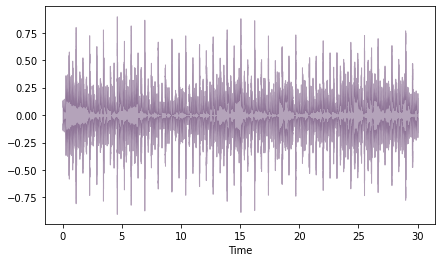

In [ ]:
plt.figure(figsize=(7,4))
librosa.display.waveshow(data,color="#6B4876", alpha = 0.5)
plt.show()

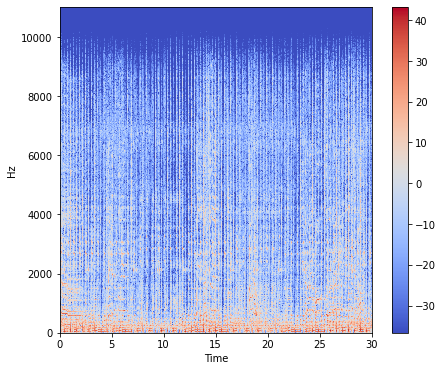

In [ ]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

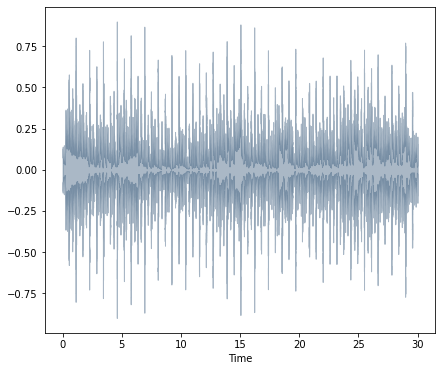

In [ ]:
spectral_rolloff=librosa.feature.spectral_rolloff(y=data,sr=sr)[0]
plt.figure(figsize=(7,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

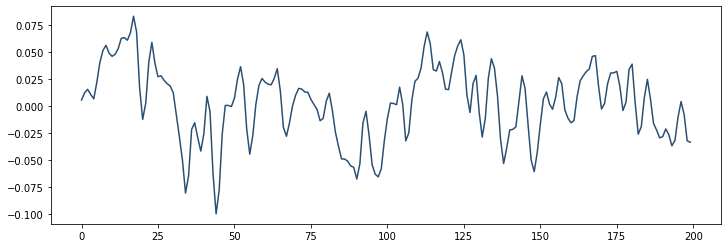

In [ ]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")

In [ ]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero_crossings are :", sum(zero_cross_rate))

The number of zero_crossings are : 39


In [ ]:
class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(df.iloc[:,:-1])

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [ ]:
df=df.drop(labels="filename",axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_train)

1998

In [ ]:
len(X_train)

7992

In [ ]:
def train_model(model,epochs,optimizer):
    batch_size=256
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [ ]:
def Validation_plot(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dropout (Dropout)           (None, 58)                0         
                                                                 
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [ ]:
model_history=train_model(model=model,epochs=600,optimizer=optimizer)

Epoch 1/600
32/32 [==============================] - 3s 10ms/step - loss: 1.9788 - accuracy: 0.2810 - val_loss: 1.5138 - val_accuracy: 0.4560
Epoch 2/600
32/32 [==============================] - 0s 5ms/step - loss: 1.6084 - accuracy: 0.4192 - val_loss: 1.2349 - val_accuracy: 0.5796
Epoch 3/600
32/32 [==============================] - 0s 5ms/step - loss: 1.4128 - accuracy: 0.4920 - val_loss: 1.0806 - val_accuracy: 0.6311
Epoch 4/600
32/32 [==============================] - 0s 5ms/step - loss: 1.3120 - accuracy: 0.5438 - val_loss: 0.9554 - val_accuracy: 0.6912
Epoch 5/600
32/32 [==============================] - 0s 5ms/step - loss: 1.2349 - accuracy: 0.5741 - val_loss: 0.8946 - val_accuracy: 0.7162
Epoch 6/600
32/32 [==============================] - 0s 5ms/step - loss: 1.1523 - accuracy: 0.6055 - val_loss: 0.8003 - val_accuracy: 0.7472
Epoch 7/600
32/32 [==============================] - 0s 5ms/step - loss: 1.1133 - accuracy: 0.6221 - val_loss: 0.7897 - val_accuracy: 0.7432
Epoch 8/600


In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=256)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

8/8 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9479
The test loss is  0.18557460606098175
The best accuracy is:  94.79479193687439


Validation Accuracy 0.9539539813995361


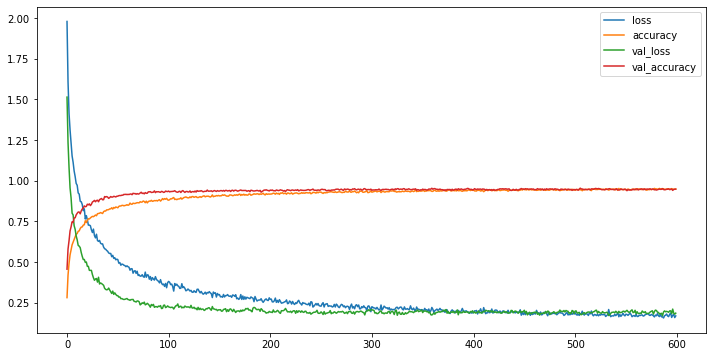

In [ ]:
# The plot shows how training and testing data performed
Validation_plot(model_history)

In [ ]:
sample = X_test
sample = sample[np.newaxis, ...]
prediction = model.predict(X_test)
predicted_index = np.argmax(prediction, axis = 1)
print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_index))

63/63 [==============================] - 0s 2ms/step
Expected Index: [6 2 1 ... 9 7 6], Predicted Index: [6 2 1 ... 9 7 6]
